# For days 2 & 4: CNN

# Importing the Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Data Source:

The dataset contains 3 main folders - test - train - val

Each folder contains 2 categories - NORMAL - PNEUMONIA

The PNEUMONIA comes from 2 different reasons - virus & bacteria

And a total of 5856 images.

We can download the data from the kaggle Website: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


#### The path of  the data

In [2]:
# my_data_dir = '/Users/kai-derwang/Desktop/X-ray/chest_xray'
my_data_dir = './data/chest_xray'

In [3]:
os.listdir(my_data_dir)

['test', 'train', 'val']

In [4]:
train_path = os.path.join(my_data_dir , 'train')
test_path = os.path.join(my_data_dir , 'test')
val_path = os.path.join(my_data_dir , 'val')

In [5]:
os.listdir(train_path)
os.listdir(test_path)
os.listdir(val_path)

['NORMAL', 'PNEUMONIA']

#### Visualize single image

In [6]:
os.listdir(train_path + '/NORMAL')[0]

'IM-0115-0001.jpeg'

In [7]:
normal_example = os.path.join(train_path , 'NORMAL/NORMAL2-IM-0927-0001.jpeg')

In [8]:
normal_example = imread(normal_example)
normal_example

array([[ 0, 23, 24, ...,  0,  0,  0],
       [ 0,  5, 23, ...,  0,  0,  0],
       [ 1,  0, 26, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [9]:
normal_example.max()
normal_example.min()
# height, width
normal_example.shape 

(2234, 2359)

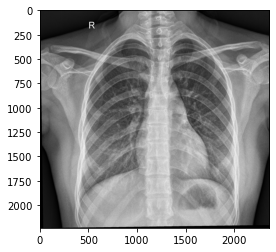

In [10]:
plt.imshow(normal_example,cmap='gray')

In [11]:
os.listdir(os.path.join(train_path , 'PNEUMONIA'))[30]

'person1019_virus_1707.jpeg'

In [12]:
abnormal_example = os.path.join(train_path , 'PNEUMONIA/person437_bacteria_1887.jpeg')

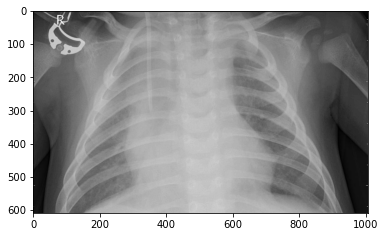

In [13]:
plt.imshow(imread(abnormal_example),cmap='gray') 

#### Check how many images are there

In [14]:
print( len(os.listdir(   os.path.join( train_path ,'NORMAL'))))

print( len(os.listdir(   os.path.join( train_path ,'PNEUMONIA'))))

print( len(os.listdir(   os.path.join( test_path ,'NORMAL'))))

print( len(os.listdir(   os.path.join( test_path ,'PNEUMONIA'))))

print( len(os.listdir(   os.path.join( val_path  ,'NORMAL'))))

print( len(os.listdir(   os.path.join( val_path  ,'PNEUMONIA'))))

1341
3875
234
390
8
8


# Data Preprocessing

In [15]:
train_gen= ImageDataGenerator(rescale=1.0/255.0)

val_gen = ImageDataGenerator(rescale=1.0/255.0)
                                   
test_gen = ImageDataGenerator(rescale=1.0/255.0)

# Building the Model

In [ ]:
model = Sequential()

# 1st Block 
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(3,3) ,input_shape=(224,224,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Block
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten and Fully Connected Layer
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))


# Sigmoid Classifier
model.add(Dense(1))
model.add(Activation('sigmoid'))


# compile model 
model.compile(optimizer='SGD',  # adam , AdaGrad and RMSProp
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

# Training the Model

In [ ]:
batch_size=64

train_img_gen = train_gen.flow_from_directory(train_path,classes =('NORMAL','PNEUMONIA'),class_mode='binary',batch_size=batch_size, target_size=(224, 224), color_mode='grayscale')
valid_img_gen = val_gen.flow_from_directory(val_path,classes =('NORMAL','PNEUMONIA'),class_mode='binary',batch_size=batch_size, target_size=(224, 224),color_mode='grayscale')
test_img_gen = test_gen.flow_from_directory(test_path,classes =('NORMAL','PNEUMONIA'),class_mode='binary',batch_size=batch_size, target_size=(224, 224),color_mode='grayscale')


In [ ]:
train_img_gen.class_indices

In [ ]:
tf.__version__
tf.config.list_physical_devices('GPU')

In [ ]:
epochs=10

model.fit_generator(train_img_gen,
                    validation_data=test_img_gen, 
                    epochs=epochs)

In [ ]:
# model.layers[0].get_weights()[0][:,:,:,0]

In [ ]:
model.save('cnn_model.h5')

# Evaluating the Model

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

In [ ]:
pred_probabilities = model.predict_generator(test_img_gen)

In [ ]:
pred_probabilities

In [ ]:
y_true = test_img_gen.classes

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

In [ ]:
confusion_matrix(y_true,predictions)

# Predicting Single Image

In [ ]:
os.listdir(test_path + '/PNEUMONIA')[30]

In [ ]:
example = test_path + '/PNEUMONIA' + '/person86_bacteria_429.jpeg'
example

In [ ]:
my_image = image.load_img(example,color_mode='grayscale',target_size=(224,224,1))
my_image

In [ ]:
type(my_image)

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
type(my_image)

In [ ]:
my_image.shape

In [ ]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

In [ ]:
model.predict(my_image)

In [ ]:
test_img_gen.class_indices